In [154]:
import pandas as pd
import numpy as np

Our dataset is from: [https://www.kaggle.com/datasets/jackogozaly/data\-science\-and\-stem\-salaries?datasetId=1640011&sortBy=voteCount](https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries?datasetId=1640011&sortBy=voteCount)


In [155]:
df = pd.read_csv("Levels_Fyi_Salary_Data.csv")

In [156]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [157]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [158]:
len(df)

62642

In [159]:
df['company'].isnull().values.any() #tells if missing value in column

True

In [160]:
df['company'].isnull().sum() #tells how many null in column

5

In [161]:
missing_cols = []
for col in df:
    if df[col].isnull().values.any():
        num = df[col].isnull().sum()
        missing_cols.append([col, num]) #shorter way of doing it (not one by one)

In [162]:
print(missing_cols)

[['company', 5], ['level', 119], ['tag', 854], ['gender', 19540], ['otherdetails', 22505], ['dmaid', 2], ['Race', 40215], ['Education', 32272]]


In [164]:
df['otherdetails'].value_counts() #seems kinda useless so get rid of it

Masters                                                                                                                                3983
Title: Software Engineer                                                                                                               1453
Race: Asian, Academic Level: Master’s degree                                                                                           1213
Race: White, Academic Level: Bachelor’s degree                                                                                         1075
Race: Asian, Academic Level: Bachelor’s degree                                                                                          977
                                                                                                                                       ... 
150,000 sign on, Title: Sr. Engineering Manager, Race: White, Academic Level: Doctorate (PhD)                                             1
Title: Sde2, Race: T

In [165]:
df['tag'].value_counts() #see above note

Full Stack                        11382
Distributed Systems (Back-End)    10838
API Development (Back-End)         6277
ML / AI                            4204
Web Development (Front-End)        2971
                                  ...  
Public Policy                         1
D&I                                   1
TeleSales                             1
Serverless                            1
Industry Cloud                        1
Name: tag, Length: 3058, dtype: int64

In [166]:
df['level'].value_counts()

L4                             5014
L5                             4871
L3                             3337
L6                             2871
Senior Software Engineer       1443
                               ... 
Mid Market                        1
Gr 7                              1
Senior BA                         1
Consulting Analyst                1
Bioinformatics Scientist II       1
Name: level, Length: 2923, dtype: int64

In [167]:
df['dmaid'].value_counts()

807.0    20400
819.0    12343
0.0       9826
501.0     5156
506.0     1773
         ...  
503.0        1
687.0        1
693.0        1
651.0        1
658.0        1
Name: dmaid, Length: 149, dtype: int64

In [168]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [169]:
df = df.drop(['level', 'tag', 'otherdetails', 'Education', 'Race', 'dmaid', 'cityid', 'rowNumber', 'timestamp'], axis = 1)

In [170]:
df.head()

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000.0,20000.0,10000.0,NaN,0,0,0,0,0,0,0,0,0,0
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,0,0
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,0,0
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000.0,180000.0,35000.0,NaN,0,0,0,0,0,0,0,0,0,0
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,0,0


In [171]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [172]:
len(df)

43098

In [173]:
df.columns

Index(['company', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue',
       'bonus', 'gender', 'Masters_Degree', 'Bachelors_Degree',
       'Doctorate_Degree', 'Highschool', 'Some_College', 'Race_Asian',
       'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic'],
      dtype='object')

In [174]:
df[df["company"] == "Microsoft"]

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
3,Microsoft,Software Engineer,150000,"Seattle, WA",4.0,0.0,118000.0,5000.0,12000.0,Male,0,0,0,0,0,0,0,0,0,0
6,Microsoft,Software Engineer,230000,"Bellevue, WA",3.0,0.0,140000.0,75000.0,15000.0,Male,0,0,0,0,0,0,0,0,0,0
22,Microsoft,Software Engineer,210000,"Seattle, WA",10.0,10.0,160000.0,30000.0,20000.0,Male,0,0,0,0,0,0,0,0,0,0
29,Microsoft,Product Manager,174000,"Seattle, WA",11.0,3.0,132000.0,22000.0,20000.0,Male,0,0,0,0,0,0,0,0,0,0
34,Microsoft,Product Manager,357000,"Redmond, WA",13.0,13.0,201000.0,100000.0,50000.0,Male,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43078,Microsoft,Product Manager,1240000,"Seattle, WA",25.0,9.0,310000.0,550000.0,180000.0,Male,0,0,0,0,0,0,0,0,0,0
43087,Microsoft,Software Engineer,135000,"Redmond, WA",1.0,1.0,106000.0,7500.0,10000.0,Female,0,0,0,0,0,0,0,0,0,0
43089,Microsoft,Solution Architect,340000,"San Jose, CA",23.0,13.0,200000.0,60000.0,80000.0,Male,0,0,0,0,0,0,0,0,0,0
43091,Microsoft,Software Engineer,194000,"Tel Aviv, TA, Israel",13.0,6.0,140000.0,29000.0,25000.0,Male,0,0,0,0,0,0,0,0,0,0


In [175]:
min(df["basesalary"])

0.0

In [176]:
max(df['basesalary'])

1620000.0

In [177]:
max(df['bonus'])

1000000.0

In [178]:
df[df['bonus'] == 1000000]

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
326,IBM,Software Engineer,125000,"Austin, TX",6.0,3.0,125000.0,0.0,1000000.0,Male,0,0,0,0,0,0,0,0,0,0


In [179]:
df.value_counts('yearsofexperience') # amount of years of experience

yearsofexperience
5.00     4004
3.00     3947
2.00     3911
4.00     3499
0.00     3198
10.00    3075
1.00     2891
6.00     2757
8.00     2472
7.00     2412
15.00    1866
12.00    1469
9.00     1413
20.00    1210
11.00     816
14.00     786
13.00     777
16.00     503
18.00     437
17.00     356
25.00     273
19.00     213
22.00     163
21.00     133
23.00     110
24.00      92
30.00      90
26.00      38
28.00      29
27.00      28
35.00      25
29.00      19
40.00      12
32.00      10
33.00       9
2.50        8
31.00       6
1.50        6
38.00       4
36.00       3
3.50        3
39.00       2
41.00       2
0.25        2
42.00       2
7.50        2
37.00       2
34.00       1
4.50        1
3.80        1
0.30        1
0.50        1
0.58        1
0.60        1
0.80        1
8.50        1
1.60        1
6.50        1
5.50        1
45.00       1
dtype: int64

In [180]:
df.value_counts('company')

company
Amazon             5525
Microsoft          3641
Google             2978
Facebook           2118
Apple              1384
                   ... 
General mills         1
Global payments       1
Globallogic           1
Glu mobile            1
 Google               1
Length: 1478, dtype: int64

In [181]:
df[df['basesalary'] >= 1620000]

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
42623,Squarespace,Software Engineer,162000,"New York, NY",7.0,7.0,1620000.0,0.0,0.0,Male,0,0,0,0,0,0,0,0,0,0


In [182]:
max(df['totalyearlycompensation'])

4980000

In [183]:
df[df['totalyearlycompensation'] >= 4980000]

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
42714,Facebook,Product Manager,4980000,"Menlo Park, CA",17.0,0.0,380000.0,4400.0,200000.0,Male,1,0,0,0,0,1,0,0,0,0


In [184]:
df[df['Race_Asian'] == 1]

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
5129,Intel,Hardware Engineer,200000,"Santa Clara, CA",14.0,3.0,163000.0,10000.0,27000.0,Female,0,0,0,0,0,1,0,0,0,0
7993,Latch,Software Engineering Manager,170000,"New York, NY",6.0,2.0,170000.0,0.0,0.0,Male,0,0,0,0,0,1,0,0,0,0
10054,Intuit,Software Engineer,134000,"Mountain View, CA",1.0,1.0,110000.0,13000.0,11000.0,Male,0,0,0,0,0,1,0,0,0,0
11153,Google,Software Engineer,400000,"Sunnyvale, CA",5.0,5.0,210000.0,145000.0,45000.0,Male,0,0,1,0,0,1,0,0,0,0
11984,Spotify,Software Engineer,210000,"New York, NY",8.0,2.5,170000.0,40000.0,0.0,Male,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42611,Adobe,Product Designer,300000,"San Francisco, CA",5.0,0.0,180000.0,100000.0,20000.0,Male,0,1,0,0,0,1,0,0,0,0
42709,Facebook,Software Engineering Manager,1470000,"Menlo Park, CA",9.0,7.0,290000.0,1100.0,80000.0,Male,0,1,0,0,0,1,0,0,0,0
42710,Google,Product Manager,4500000,"San Francisco, CA",20.0,14.0,450000.0,3700.0,350000.0,Male,1,0,0,0,0,1,0,0,0,0
42712,Amazon,Software Engineering Manager,1660000,"Seattle, WA",15.0,15.0,160000.0,1500.0,0.0,Male,0,0,0,0,0,1,0,0,0,0


In [185]:
df.value_counts('Race_Asian')

Race_Asian
0    31395
1    11703
dtype: int64

In [186]:
df.location.value_counts()

Seattle, WA                          5800
San Francisco, CA                    4319
New York, NY                         3102
Redmond, WA                          1838
Sunnyvale, CA                        1528
                                     ... 
Graz, ST, Austria                       1
Trondheim, ST, Norway                   1
Mandaluyong City, MM, Philippines       1
Elk Grove, CA                           1
Hilbert, WI                             1
Name: location, Length: 936, dtype: int64

In [187]:
def get_state(x):
    words = x.split(', ')
    state = words[1]
    if state == 'CA':
        return 'CA'
    elif state == 'WA':
        return 'WA'
    elif state == 'NY':
        return 'NY'
    else:
        return 'Other'

In [188]:
df['state'] = df['location'].apply(get_state)
df.drop(['location'], axis = 1, inplace = True)

In [189]:
df.head()

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,state
0,GE Digital,Software Engineer,140000,4.0,4.0,130000.0,0.0,10000.0,Male,0,0,0,0,0,0,0,0,0,0,CA
1,Amazon,Software Engineer,172000,12.0,2.0,142000.0,30000.0,0.0,Male,0,0,0,0,0,0,0,0,0,0,WA
2,Uber,Software Engineer,325000,7.0,2.0,161000.0,140000.0,25000.0,Male,0,0,0,0,0,0,0,0,0,0,CA
3,Microsoft,Software Engineer,150000,4.0,0.0,118000.0,5000.0,12000.0,Male,0,0,0,0,0,0,0,0,0,0,WA
4,Google,Software Engineer,640000,11.0,4.0,210000.0,380000.0,50000.0,Male,0,0,0,0,0,0,0,0,0,0,CA


In [190]:
df.state.value_counts()

Other    16507
CA       15023
WA        8347
NY        3221
Name: state, dtype: int64

In [191]:
df.company.value_counts().index

Index(['Amazon', 'Microsoft', 'Google', 'Facebook', 'Apple', 'Oracle',
       'Salesforce', 'Intel', 'IBM', 'Cisco',
       ...
       'Quantumblack', 'sony', 'commvault', 'atlassian', 'MICROSOFT', 'GOogle',
       'Refinitiv', 'cadence design systems', 'Moody's analytics',
       'tableau software'],
      dtype='object', length=1478)

In [192]:
top_15_popular = list(df['company'].value_counts().index)[:15] #list of companies from 1-15
def in_popular(x): #this is a function
    if x in top_15_popular:
        return True
    else:
        return False
    
df['in_top_15'] = df['company'].apply(in_popular) #applying the function in_popular

In [193]:
df.head()

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,state,in_top_15
0,GE Digital,Software Engineer,140000,4.0,4.0,130000.0,0.0,10000.0,Male,0,...,0,0,0,0,0,0,0,0,CA,False
1,Amazon,Software Engineer,172000,12.0,2.0,142000.0,30000.0,0.0,Male,0,...,0,0,0,0,0,0,0,0,WA,True
2,Uber,Software Engineer,325000,7.0,2.0,161000.0,140000.0,25000.0,Male,0,...,0,0,0,0,0,0,0,0,CA,True
3,Microsoft,Software Engineer,150000,4.0,0.0,118000.0,5000.0,12000.0,Male,0,...,0,0,0,0,0,0,0,0,WA,True
4,Google,Software Engineer,640000,11.0,4.0,210000.0,380000.0,50000.0,Male,0,...,0,0,0,0,0,0,0,0,CA,True


In [194]:
# name of df.groupby(by = name of column you wanna group by)[column of data you want to look at].function to apply

In [195]:
df.groupby(by = 'gender')['basesalary'].mean()

gender
Female                             133823.203315
Male                               136322.098381
Other                              141050.000000
Title: Senior Software Engineer    177000.000000
Name: basesalary, dtype: float64

In [196]:
df.groupby(by = 'title')['basesalary'].mean()

title
Business Analyst                100979.127135
Data Scientist                  138795.977011
Hardware Engineer               137322.200393
Human Resources                 128033.816425
Management Consultant           133762.903226
Marketing                       138347.517730
Mechanical Engineer             116832.236842
Product Designer                138979.877515
Product Manager                 149058.022200
Recruiter                       115087.591241
Sales                           113321.428571
Software Engineer               131683.194647
Software Engineering Manager    175639.834926
Solution Architect              140747.201493
Technical Program Manager       154503.919373
Name: basesalary, dtype: float64

In [197]:
df.groupby(by = 'title')['yearsofexperience'].max()

title
Business Analyst                45.0
Data Scientist                  30.0
Hardware Engineer               40.0
Human Resources                 40.0
Management Consultant           33.0
Marketing                       35.0
Mechanical Engineer             33.0
Product Designer                30.0
Product Manager                 38.0
Recruiter                       32.0
Sales                           30.0
Software Engineer               42.0
Software Engineering Manager    40.0
Solution Architect              35.0
Technical Program Manager       38.0
Name: yearsofexperience, dtype: float64

In [198]:
df.groupby(by = 'title')['yearsofexperience'].mean()

title
Business Analyst                 5.812144
Data Scientist                   4.913218
Hardware Engineer                7.902423
Human Resources                 10.526570
Management Consultant            7.338710
Marketing                        9.248227
Mechanical Engineer              6.115132
Product Designer                 7.584427
Product Manager                  9.084068
Recruiter                        8.135036
Sales                            8.814286
Software Engineer                6.027325
Software Engineering Manager    14.123154
Solution Architect              12.717662
Technical Program Manager       12.272116
Name: yearsofexperience, dtype: float64

In [199]:
df.groupby(by = 'title')['yearsofexperience'].min()

title
Business Analyst                0.0
Data Scientist                  0.0
Hardware Engineer               0.0
Human Resources                 0.0
Management Consultant           0.0
Marketing                       0.0
Mechanical Engineer             0.0
Product Designer                0.0
Product Manager                 0.0
Recruiter                       1.0
Sales                           1.0
Software Engineer               0.0
Software Engineering Manager    0.0
Solution Architect              0.0
Technical Program Manager       0.0
Name: yearsofexperience, dtype: float64

In [200]:
df.groupby(by = 'title').mean().reset_index() #gives mean of EVERYTHING, reset_index() gives index again

,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,in_top_15
0,Business Analyst,124958.254269,5.812144,2.641935,100979.127135,12453.510436,11307.400380,0.413662,0.497154,0.007590,0.000000,0.005693,0.436433,0.309298,0.037951,0.039848,0.049336,0.387097
1,Data Scientist,200444.252874,4.913218,1.987701,138795.977011,39868.390805,17522.988506,0.413218,0.134483,0.186207,0.001724,0.000575,0.287931,0.181609,0.016092,0.007471,0.018391,0.448851
2,Hardware Engineer,206120.497708,7.902423,4.011329,137322.200393,44319.253438,21451.866405,0.478716,0.131631,0.123772,0.000000,0.001310,0.371971,0.110020,0.018991,0.010478,0.017027,0.550098
3,Human Resources,177980.676329,10.526570,3.623188,128033.816425,31236.714976,18830.917874,0.449275,0.400966,0.024155,0.009662,0.009662,0.188406,0.449275,0.048309,0.111111,0.067633,0.487923
4,Management Consultant,157732.258065,7.338710,3.153629,133762.903226,5204.838710,18872.580645,0.479032,0.382258,0.012903,0.000000,0.006452,0.287097,0.345161,0.017742,0.038710,0.050000,0.090323
5,Marketing,198356.973995,9.248227,3.369976,138347.517730,37392.671395,19572.104019,0.375887,0.510638,0.009456,0.016548,0.009456,0.255319,0.460993,0.054374,0.056738,0.056738,0.520095
6,Mechanical Engineer,156250.000000,6.115132,3.115132,116832.236842,28049.342105,11148.026316,0.388158,0.467105,0.075658,0.000000,0.009868,0.404605,0.345395,0.032895,0.013158,0.052632,0.302632
7,Product Designer,209460.192476,7.584427,2.318591,138979.877515,46653.543307,18667.541557,0.274716,0.324584,0.016623,0.015748,0.011374,0.223097,0.240595,0.029746,0.028871,0.032371,0.530184
8,Product Manager,250075.416259,9.084068,3.186565,149058.022200,65295.401567,24226.660137,0.426706,0.206334,0.012080,0.004244,0.005550,0.236696,0.190989,0.020895,0.016324,0.023506,0.557950
9,Recruiter,153773.722628,8.135036,2.306569,115087.591241,24656.934307,12328.467153,0.149635,0.653285,0.000000,0.025547,0.029197,0.171533,0.437956,0.062044,0.062044,0.083942,0.551095


In [201]:
import plotly.express as px

<AxesSubplot:xlabel='yearsofexperience', ylabel='totalyearlycompensation'>

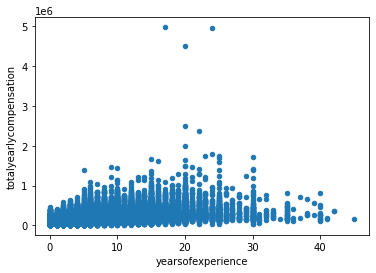

In [202]:
df.plot.scatter(x='yearsofexperience', y='totalyearlycompensation')

In [228]:
plot1 = px.pie(df, 'yearsofexperience', title = 'years of experience as a percentage')
plot1.show()

In [229]:
plot2 = px.histogram(df, x = 'yearsatcompany', y = 'totalyearlycompensation', title = 'total yearly salary by years at company', color = 'in_top_15')
plot2.show()

In [230]:
plot2 = px.scatter(df, x = 'yearsatcompany', y = 'totalyearlycompensation', title = 'fun', color = 'in_top_15')
plot2.show()

In [206]:
plot4 = px.scatter(df, x = 'gender', y = 'totalyearlycompensation', title = 'extra fun', color = 'in_top_15')
plot4.show()

In [207]:
plot5 = px.histogram(df, x = 'state', y = 'totalyearlycompensation', title = 'super fun', color = 'gender')
plot5.show()

In [208]:
plot6 = px.pie(df, 'gender')
plot6.show()

In [235]:
plot7 = px.pie(df, 'Masters_Degree')
plot7.show()

In [234]:
plot8 = px.histogram(df, x = 'totalyearlycompensation', title = 'total yearly salary', color = 'in_top_15')
plot8.show()

In [265]:
plot9 = px.histogram(df, x = 'basesalary', title = 'Base Salary in Top 15 Companies', color = 'in_top_15')
plot9.show()

In [242]:
plot10 = px.pie(df, 'yearsofexperience', title = 'years of experience as a percentage')
plot10.show()

In [245]:
df.groupby(by = 'state')['basesalary'].mean()

state
CA       162629.939559
NY       154821.018317
Other    102847.745199
WA       146169.408889
Name: basesalary, dtype: float64

In [259]:
companys = df.groupby(by = 'company').count().reset_index().sort_values(by = 'title', ascending = False).head(10)
companys

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,state,in_top_15
61,Amazon,5525,5525,5525,5525,5525,5525,5525,5525,5525,...,5525,5525,5525,5525,5525,5525,5525,5525,5525,5525
769,Microsoft,3641,3641,3641,3641,3641,3641,3641,3641,3641,...,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641
523,Google,2978,2978,2978,2978,2978,2978,2978,2978,2978,...,2978,2978,2978,2978,2978,2978,2978,2978,2978,2978
432,Facebook,2118,2118,2118,2118,2118,2118,2118,2118,2118,...,2118,2118,2118,2118,2118,2118,2118,2118,2118,2118
91,Apple,1384,1384,1384,1384,1384,1384,1384,1384,1384,...,1384,1384,1384,1384,1384,1384,1384,1384,1384,1384
865,Oracle,802,802,802,802,802,802,802,802,802,...,802,802,802,802,802,802,802,802,802,802
1004,Salesforce,695,695,695,695,695,695,695,695,695,...,695,695,695,695,695,695,695,695,695,695
610,Intel,693,693,693,693,693,693,693,693,693,...,693,693,693,693,693,693,693,693,693,693
578,IBM,676,676,676,676,676,676,676,676,676,...,676,676,676,676,676,676,676,676,676,676
260,Cisco,645,645,645,645,645,645,645,645,645,...,645,645,645,645,645,645,645,645,645,645


In [264]:
plot11 = px.pie(companys, 'title', color = 'company')
plot11.show()

In [267]:
df.groupby(by='gender')['basesalary'].max()

gender
Female                              680000.0
Male                               1620000.0
Other                               650000.0
Title: Senior Software Engineer     177000.0
Name: basesalary, dtype: float64

In [276]:
#What is the avg year total compensation for a female that works at google
sort1 = df.groupby(by ='gender')['totalyearlycompensation'].mean()
sort1

gender
Female                             195119.588513
Male                               212462.407026
Other                              232347.500000
Title: Senior Software Engineer    205000.000000
Name: totalyearlycompensation, dtype: float64

In [274]:
df.groupby(by='company')['totalyearlycompensation'].mean()

company
10x Genomics    173000.000000
23andMe         129200.000000
2U              141833.333333
3M              116058.823529
3m              115666.666667
                    ...      
zillow          280000.000000
zoominfo        150000.000000
zoox            160000.000000
zynga           300000.000000
 Google          91000.000000
Name: totalyearlycompensation, Length: 1478, dtype: float64